In [1]:
%%capture
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 4)
pylab.rcParams['axes.edgecolor'] = '#FFFFFF'

In [2]:
import datajoint as dj
from pipeline import experiment, preprocess, vis, tuning

DataJoint 0.4.3 (Nov 29, 2016)
Loading local settings from /Users/dimitri/.datajoint_config.json
Connecting dimitri@at-database.ad.bcm.edu:3306
Loading local settings from pipeline_config.json
Could not find cv2. You won't be able to use the pupil tracker.


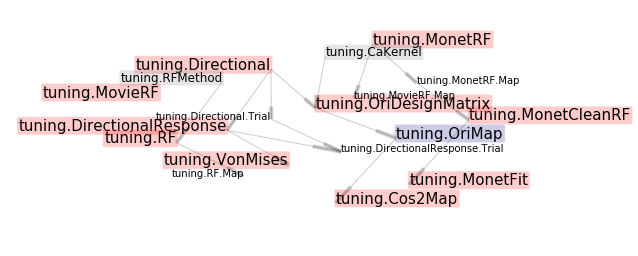

In [3]:
dj.ERD(tuning).draw()

In [4]:
ori = tuning.RF.Map() * tuning.VonMises() & 'von_pvalue<0.001' & 'rf_method=1'

In [5]:
ori

*animal_id    *session    *scan_idx    *extract_metho *spike_method  *rf_method    *trace_id    scale       von_r2        von_pref     von_base       von_amp1     von_amp2     von_sharp     von_pvalue     map       
+-----------+ +---------+ +----------+ +------------+ +------------+ +-----------+ +----------+ +---------+ +-----------+ +----------+ +------------+ +----------+ +----------+ +-----------+ +------------+ +--------+
8623          1           10           2              5              1             122          1.81739     0.102974      5.41704      28.4868        80.4247      24.4296      36.6785       5e-05          <BLOB>    
8804          1           6            2              5              1             262          1.5011      0.0951439     1.1134       9.91815        33.1424      23.7272      7.64212       5e-05          <BLOB>    
9161          1           5            2              2              1             218          1.89577     0.0712162     4.07069      -420.669       919.575      789.897      0.884115      5e-05          <BLOB>    
9960          1           3            2              5              1             51           1.83527     0.0941783     2.81451      68.229         242.254      153.452      13.4177       5e-05          <BLOB>    
8764          1           7            2              2              1             269          1.71223     0.1203        5.52452      199.775        549.39       391.301      29.5915       5e-05          <BLOB>    
8973          1           3            2              2              1             360          1.5441      0.230443      2.15699      66.512         560.547      365.025      9.91331       5e-05          <BLOB>    
10469         1           1            2              3              1             20           1.49813     0.309096      2.69716      0.00130297     0.183683     0.150794     8.07933       5e-05          <BLOB>    
   ...
 (27508 tuples)

In [6]:
z = ori.fetch.as_dict.limit(10).offset(3000)()

In [7]:
def make_it_happen(key):
    fig = figure()
    ori = tuning.RF.Map() * tuning.VonMises() & 'rf_method=1' & key
    c = ori.fetch1()
    ax = subplot(1, 2, 1)
    im = np.float64(c['map'][:,:,1])*c['scale']/127
    ax.imshow(im, cmap=cm.seismic, vmin=-15, vmax=15)
    ax.axis('off')
    ax = subplot(1, 2, 2, polar=True)
    phi = np.arange(0, 2*np.pi, 0.01)
    cos = np.cos(phi - c['von_pref'])
    x, y = (tuning.DirectionalResponse.Trial()*
            tuning.Directional.Trial() & c).fetch['direction', 'response']
    ux = np.unique(x)
    ux = np.append(ux, ux[0])
    m = np.array([(y[x==ux]).mean() for ux in ux])
    x = 90 - x;
    ux = 90 - ux;
    phi = np.pi/2 - phi;
    r = (c['von_base'] + 
         c['von_amp1']*np.exp(c['von_sharp']*(cos-1)) + 
         c['von_amp2']*np.exp(c['von_sharp']*(-cos-1)))
    ax.plot(phi, r, 'b', lw=2, alpha=0.6)
    max_r = r.max()*2.0;
    ax.plot(x/180*np.pi, np.minimum(y, 0.9*max_r), 'o', color='#004400', ms=6, alpha=0.1)
    ax.plot(ux/180*np.pi, m, 'r', lw=3, alpha=0.4) 
    ax.set_rmax(max_r)
    ax.yaxis.grid(False)
    ax.yaxis.set_ticks([])
    ax.xaxis.set_ticks(np.r_[0:359:45]*np.pi/180)
    ax.xaxis.set_ticklabels([])
    fig.suptitle('Mouse {animal_id} scan {session}:{scan_idx} trace {trace_id:03d}'.format(**key))
    savefig('Mouse {animal_id} scan {session}:{scan_idx} trace {trace_id:03d}.pdf'.format(**key))

In [8]:
key = dict(
    animal_id=8623, 
    session=1, 
    scan_idx=7, 
    extract_method=2, 
    spike_method=5, 
    trace_id=294)

In [9]:
tuning.RF.Map() * tuning.VonMises() & 'rf_method=1' & key

*animal_id    *session    *scan_idx    *extract_metho *spike_method  *rf_method    *trace_id    scale       von_r2        von_pref     von_base     von_amp1     von_amp2     von_sharp     von_pvalue     map       
+-----------+ +---------+ +----------+ +------------+ +------------+ +-----------+ +----------+ +---------+ +-----------+ +----------+ +----------+ +----------+ +----------+ +-----------+ +------------+ +--------+
8623          1           7            2              5              1             294          2.08426     0.0483452     3.86703      -45.547      101.853      58.3261      0.884115      0.00564972     <BLOB>    
 (1 tuples)

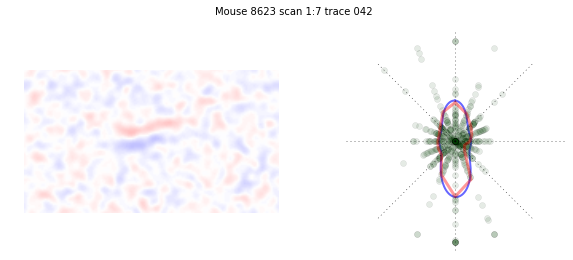

In [10]:
make_it_happen(dict(
    animal_id=8623, 
    session=1, 
    scan_idx=7, 
    extract_method=2, 
    spike_method=2, 
    trace_id=42))

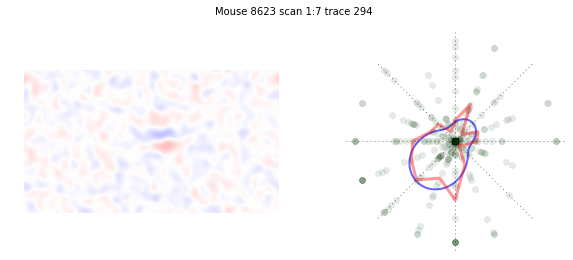

In [11]:
make_it_happen(dict(
    animal_id=8623, 
    session=1, 
    scan_idx=7, 
    extract_method=2, 
    spike_method=5, 
    trace_id=294))

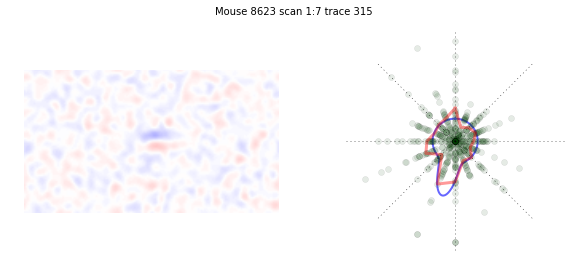

In [12]:
make_it_happen(dict(
    animal_id=8623, 
    session=1, 
    scan_idx=7, 
    extract_method=2, 
    spike_method=2, 
    trace_id=315))

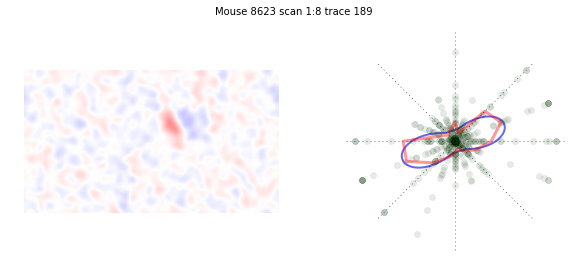

In [13]:
make_it_happen(dict(
    animal_id=8623, 
    session=1, 
    scan_idx=8, 
    extract_method=2, 
    spike_method=2, 
    trace_id=189))

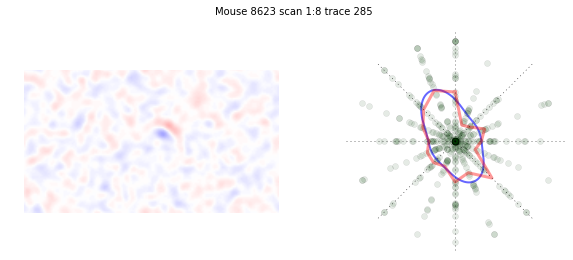

In [14]:
make_it_happen(dict(
    animal_id=8623, 
    session=1, 
    scan_idx=8, 
    extract_method=2, 
    spike_method=2, 
    trace_id=285))

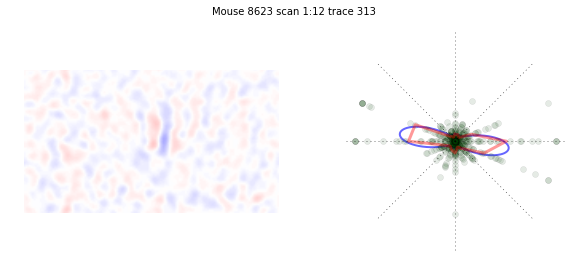

In [15]:
make_it_happen(dict(
    animal_id=8623, 
    session=1, 
    scan_idx=12, 
    extract_method=2, 
    spike_method=2, 
    trace_id=313))

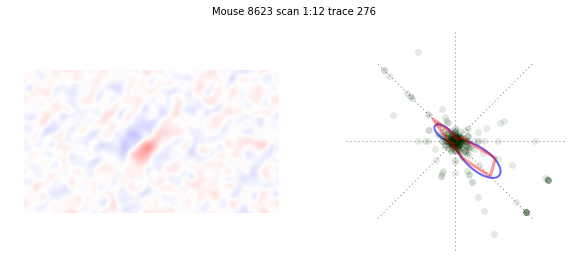

In [16]:
make_it_happen(dict(
    animal_id=8623, 
    session=1, 
    scan_idx=12, 
    extract_method=2, 
    spike_method=2, 
    trace_id=276))

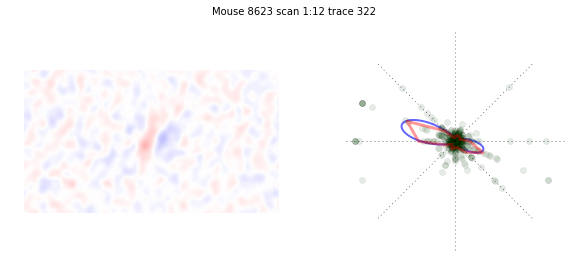

In [17]:
make_it_happen(dict(
    animal_id=8623, 
    session=1, 
    scan_idx=12, 
    extract_method=2, 
    spike_method=2, 
    trace_id=322))

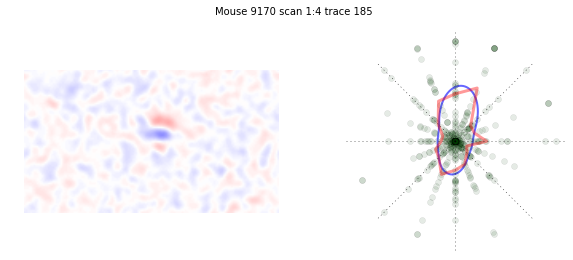

In [18]:
make_it_happen(dict(
    animal_id=9170, 
    session=1, 
    scan_idx=4, 
    extract_method=2, 
    spike_method=2, 
    trace_id=185))

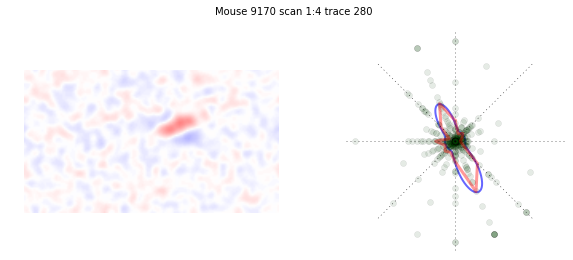

In [19]:
make_it_happen(dict(
    animal_id=9170, 
    session=1, 
    scan_idx=4, 
    extract_method=2, 
    spike_method=2, 
    trace_id=280))

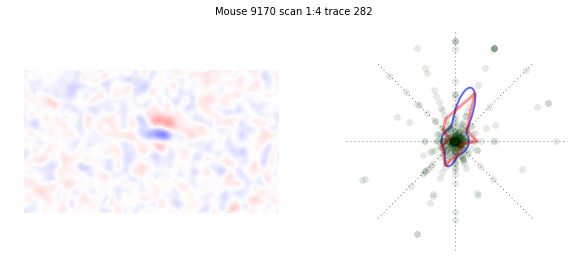

In [20]:
make_it_happen(dict(
    animal_id=9170, 
    session=1, 
    scan_idx=4, 
    extract_method=2, 
    spike_method=2, 
    trace_id=282))

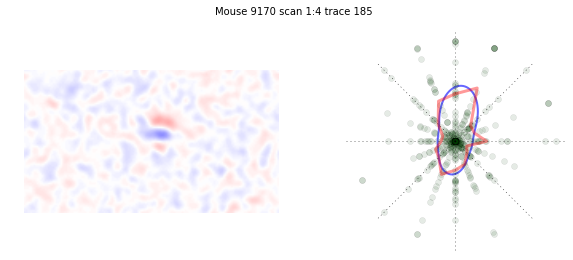

In [21]:
make_it_happen(dict(
    animal_id=9170, 
    session=1, 
    scan_idx=4, 
    extract_method=2, 
    spike_method=2, 
    trace_id=185))

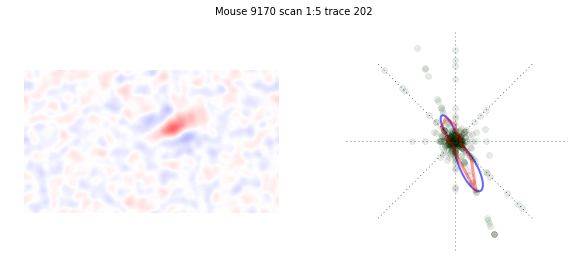

In [22]:
make_it_happen(dict(
    animal_id=9170, 
    session=1, 
    scan_idx=5, 
    extract_method=2, 
    spike_method=2, 
    trace_id=202))

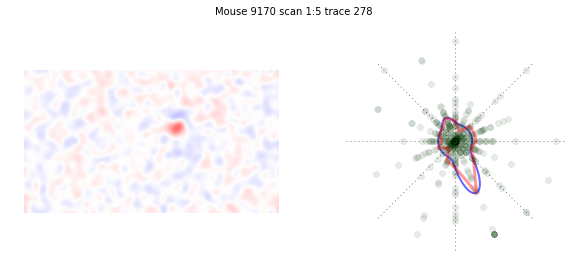

In [23]:
make_it_happen(dict(
    animal_id=9170, 
    session=1, 
    scan_idx=5, 
    extract_method=2, 
    spike_method=2, 
    trace_id=278))

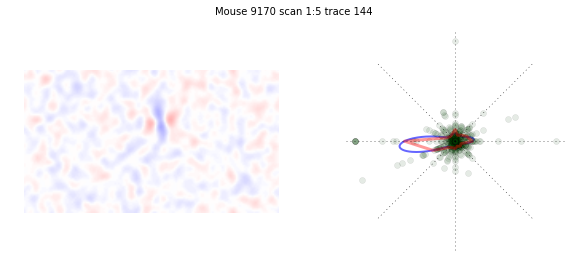

In [24]:
make_it_happen(dict(
    animal_id=9170, 
    session=1, 
    scan_idx=5, 
    extract_method=2, 
    spike_method=2, 
    trace_id=144))

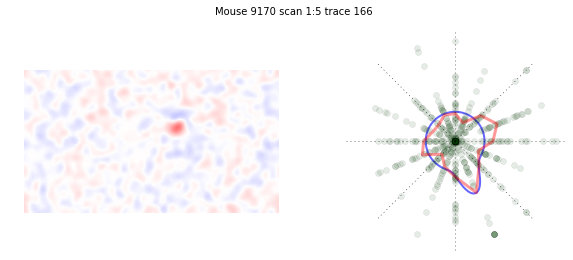

In [25]:
make_it_happen(dict(
    animal_id=9170, 
    session=1, 
    scan_idx=5, 
    extract_method=2, 
    spike_method=2, 
    trace_id=166))

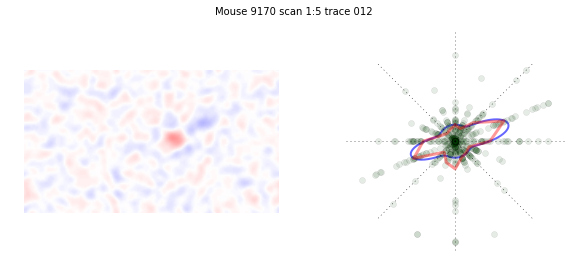

In [26]:
make_it_happen(dict(
    animal_id=9170, 
    session=1, 
    scan_idx=5, 
    extract_method=2, 
    spike_method=2, 
    trace_id=12))

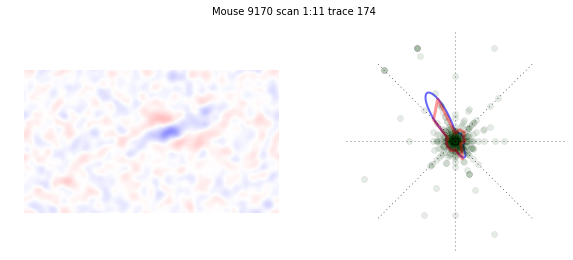

In [27]:
make_it_happen(dict(
    animal_id=9170, 
    session=1, 
    scan_idx=11, 
    extract_method=2, 
    spike_method=2, 
    trace_id=174))

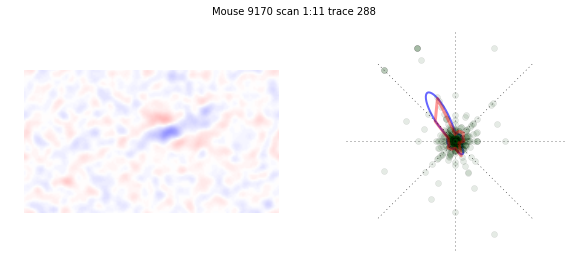

In [28]:
make_it_happen(dict(
    animal_id=9170, 
    session=1, 
    scan_idx=11, 
    extract_method=2, 
    spike_method=2, 
    trace_id=288))

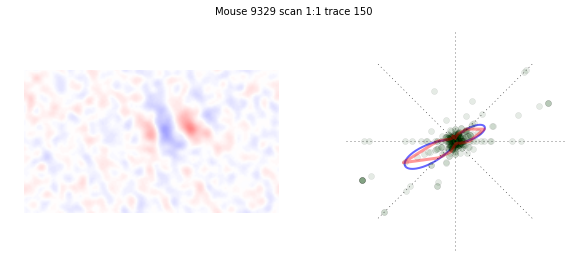

In [29]:
make_it_happen(dict(
    animal_id=9329, 
    session=1, 
    scan_idx=1, 
    extract_method=2, 
    spike_method=2, 
    trace_id=150))

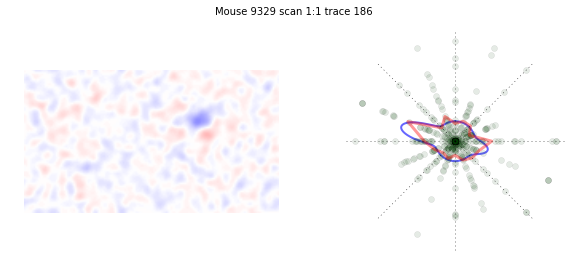

In [30]:
make_it_happen(dict(
    animal_id=9329, 
    session=1, 
    scan_idx=1, 
    extract_method=2, 
    spike_method=2, 
    trace_id=186))

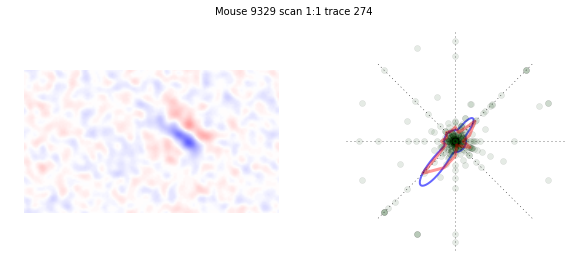

In [31]:
make_it_happen(dict(
    animal_id=9329, 
    session=1, 
    scan_idx=1, 
    extract_method=2, 
    spike_method=2, 
    trace_id=274))

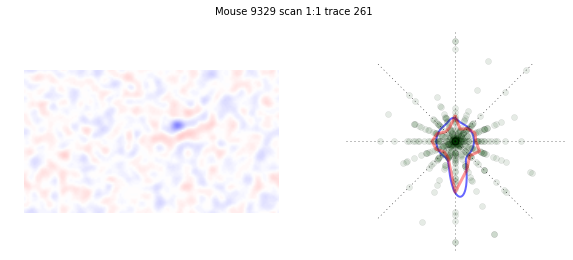

In [32]:
make_it_happen(dict(
    animal_id=9329, 
    session=1, 
    scan_idx=1, 
    extract_method=2, 
    spike_method=2, 
    trace_id=261))

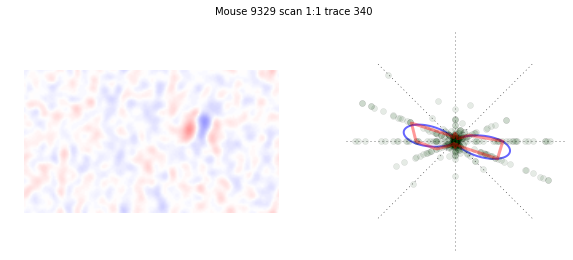

In [33]:
make_it_happen(dict(
    animal_id=9329, 
    session=1, 
    scan_idx=1, 
    extract_method=2, 
    spike_method=2, 
    trace_id=340))

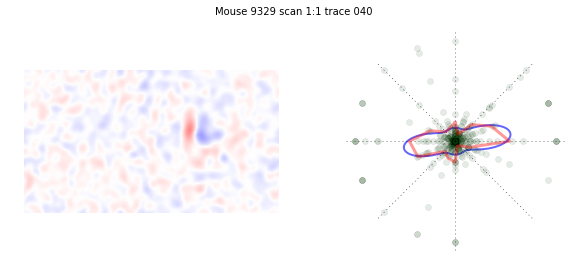

In [34]:
make_it_happen(dict(
    animal_id=9329, 
    session=1, 
    scan_idx=1, 
    extract_method=2, 
    spike_method=2, 
    trace_id=40))

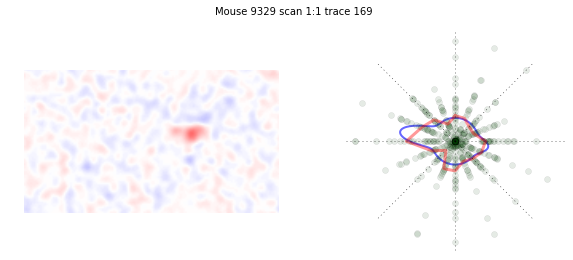

In [35]:
make_it_happen(dict(
    animal_id=9329, 
    session=1, 
    scan_idx=1, 
    extract_method=2, 
    spike_method=2, 
    trace_id=169))

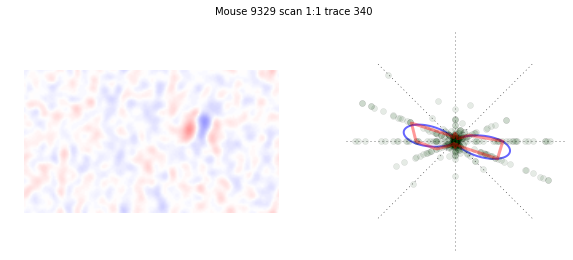

In [36]:
make_it_happen(dict(
    animal_id=9329, 
    session=1, 
    scan_idx=1, 
    extract_method=2, 
    spike_method=2, 
    trace_id=340))

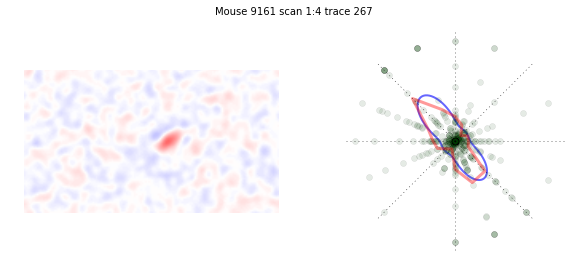

In [37]:
make_it_happen(dict(
    animal_id=9161, 
    session=1, 
    scan_idx=4, 
    extract_method=2, 
    spike_method=2, 
    trace_id=267))

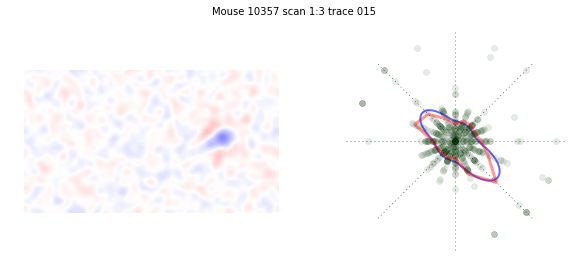

In [38]:
make_it_happen(dict(
    animal_id=10357, 
    session=1, 
    scan_idx=3, 
    extract_method=2, 
    spike_method=5, 
    trace_id=15))

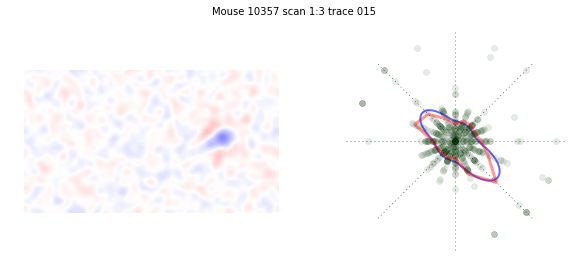

In [39]:
make_it_happen(dict(
    animal_id=10357, 
    session=1, 
    scan_idx=3, 
    extract_method=2, 
    spike_method=5, 
    trace_id=15))

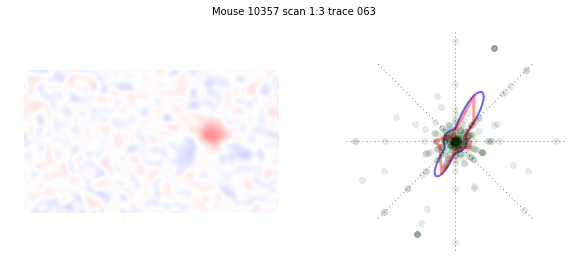

In [40]:
make_it_happen(dict(
    animal_id=10357, 
    session=1, 
    scan_idx=3, 
    extract_method=2, 
    spike_method=5, 
    trace_id=63))

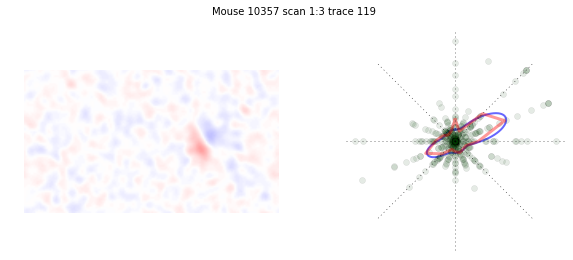

In [41]:
make_it_happen(dict(
    animal_id=10357, 
    session=1, 
    scan_idx=3, 
    extract_method=2, 
    spike_method=5, 
    trace_id=119))

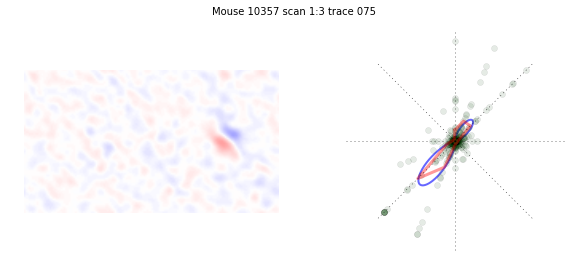

In [42]:
make_it_happen(dict(
    animal_id=10357, 
    session=1, 
    scan_idx=3, 
    extract_method=2, 
    spike_method=5, 
    trace_id=75))

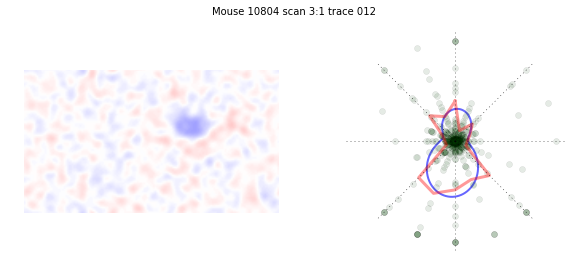

In [43]:
make_it_happen(dict(
    animal_id=10804, 
    session=3, 
    scan_idx=1, 
    extract_method=1, 
    spike_method=3, 
    trace_id=12))

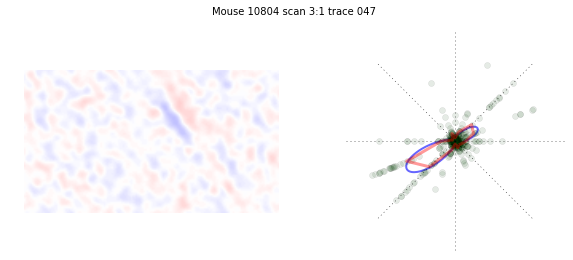

In [44]:
make_it_happen(dict(
    animal_id=10804, 
    session=3, 
    scan_idx=1, 
    extract_method=1, 
    spike_method=3, 
    trace_id=47))

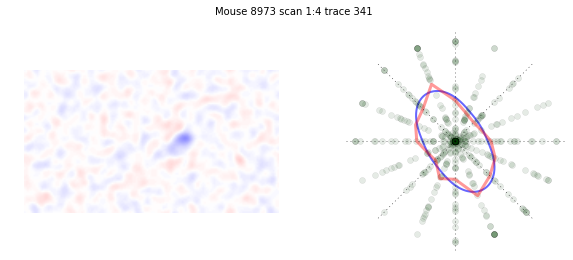

In [45]:
make_it_happen(dict(
    animal_id=8973, 
    session=1, 
    scan_idx=4, 
    extract_method=2, 
    spike_method=2, 
    trace_id=341))

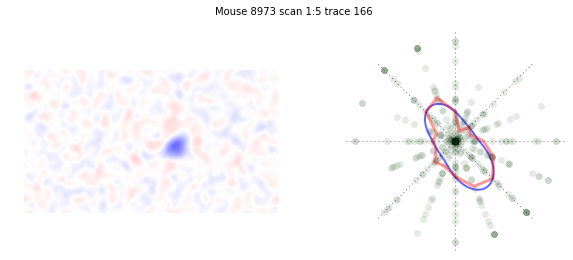

In [46]:
make_it_happen(dict(
    animal_id=8973, 
    session=1, 
    scan_idx=5, 
    extract_method=2, 
    spike_method=2, 
    trace_id=166))

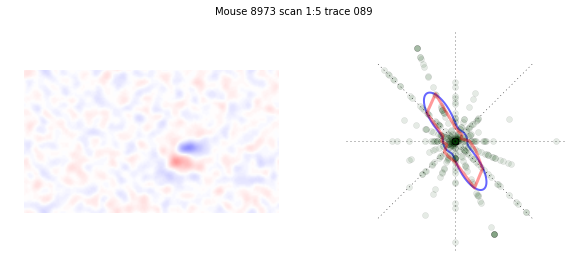

In [47]:
make_it_happen(dict(
    animal_id=8973, 
    session=1, 
    scan_idx=5, 
    extract_method=2, 
    spike_method=2, 
    trace_id=89))

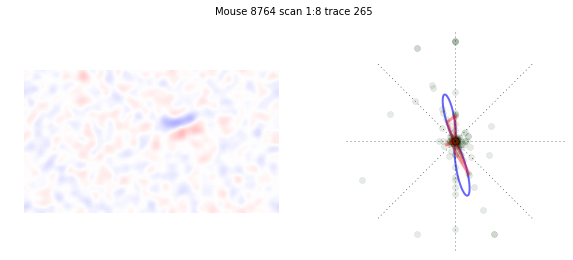

In [48]:
make_it_happen(dict(
    animal_id=8764, 
    session=1, 
    scan_idx=8, 
    extract_method=2, 
    spike_method=5, 
    trace_id=265))

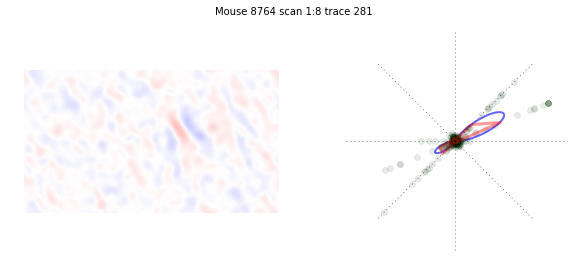

In [49]:
make_it_happen(dict(
    animal_id=8764, 
    session=1, 
    scan_idx=8, 
    extract_method=2, 
    spike_method=5, 
    trace_id=281))

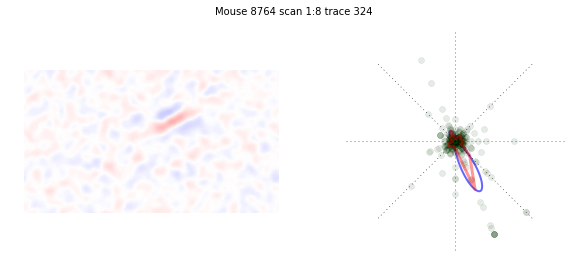

In [50]:
make_it_happen(dict(
    animal_id=8764, 
    session=1, 
    scan_idx=8, 
    extract_method=2, 
    spike_method=5, 
    trace_id=324))

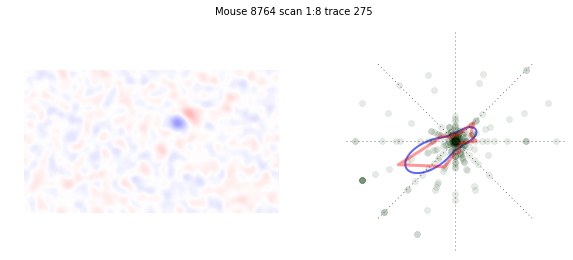

In [51]:
make_it_happen(dict(
    animal_id=8764, 
    session=1, 
    scan_idx=8, 
    extract_method=2, 
    spike_method=5, 
    trace_id=275))

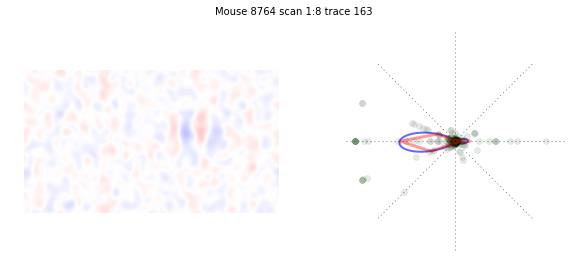

In [52]:
make_it_happen(dict(
    animal_id=8764, 
    session=1, 
    scan_idx=8, 
    extract_method=2, 
    spike_method=5, 
    trace_id=163))

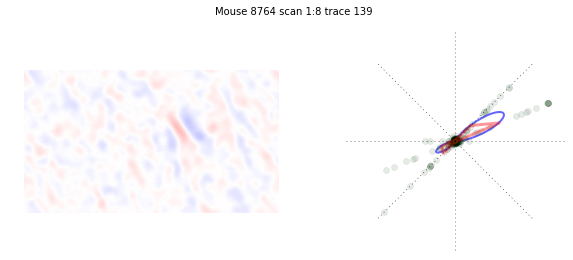

In [53]:
make_it_happen(dict(
    animal_id=8764, 
    session=1, 
    scan_idx=8, 
    extract_method=2, 
    spike_method=5, 
    trace_id=139))

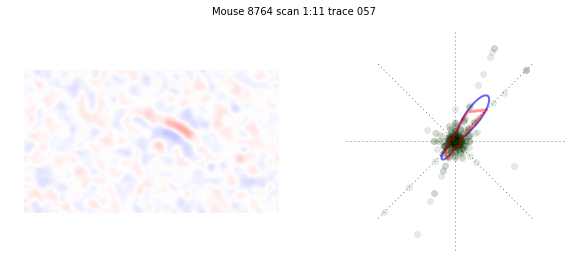

In [54]:
make_it_happen(dict(
    animal_id=8764, 
    session=1, 
    scan_idx=11, 
    extract_method=2, 
    spike_method=2, 
    trace_id=57))

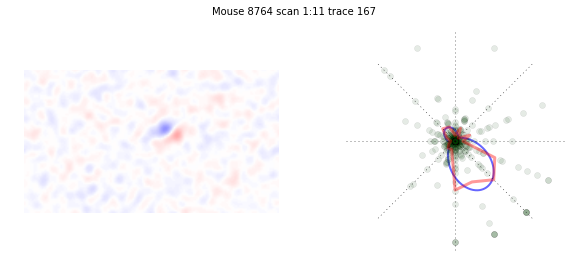

In [55]:
make_it_happen(dict(
    animal_id=8764, 
    session=1, 
    scan_idx=11, 
    extract_method=2, 
    spike_method=5, 
    trace_id=167))

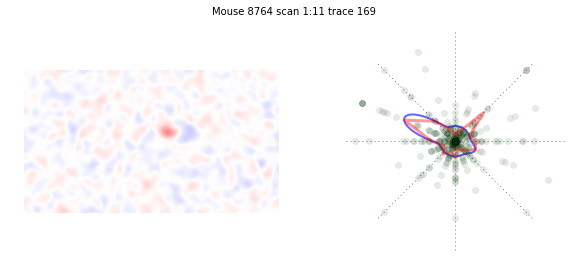

In [56]:
make_it_happen(dict(
    animal_id=8764, 
    session=1, 
    scan_idx=11, 
    extract_method=2, 
    spike_method=2, 
    trace_id=169))

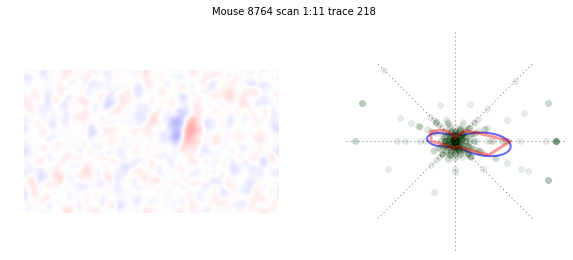

In [57]:
make_it_happen(dict(
    animal_id=8764, 
    session=1, 
    scan_idx=11, 
    extract_method=2, 
    spike_method=5, 
    trace_id=218))

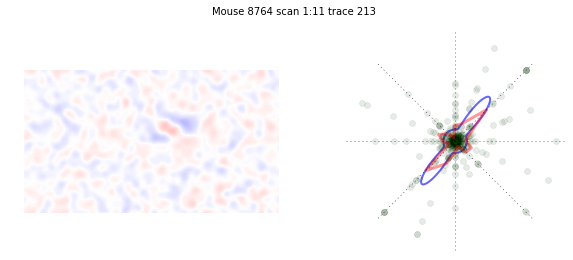

In [58]:
make_it_happen(dict(
    animal_id=8764, 
    session=1, 
    scan_idx=11, 
    extract_method=2, 
    spike_method=3, 
    trace_id=213))

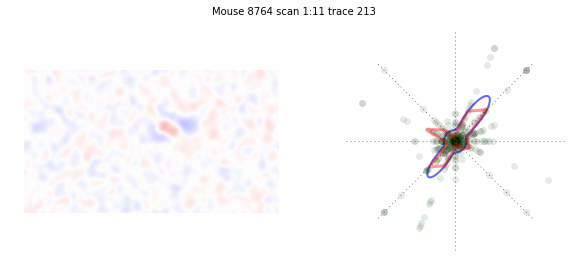

In [59]:
make_it_happen(dict(
    animal_id=8764, 
    session=1, 
    scan_idx=11, 
    extract_method=2, 
    spike_method=5, 
    trace_id=213))

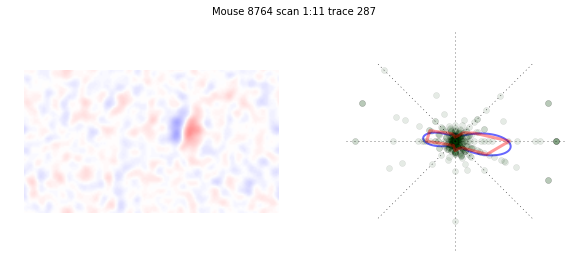

In [60]:
make_it_happen(dict(
    animal_id=8764, 
    session=1, 
    scan_idx=11, 
    extract_method=2, 
    spike_method=2, 
    trace_id=287))

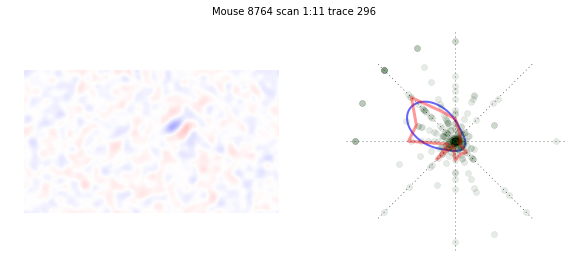

In [61]:
make_it_happen(dict(
    animal_id=8764, 
    session=1, 
    scan_idx=11, 
    extract_method=2, 
    spike_method=5, 
    trace_id=296))

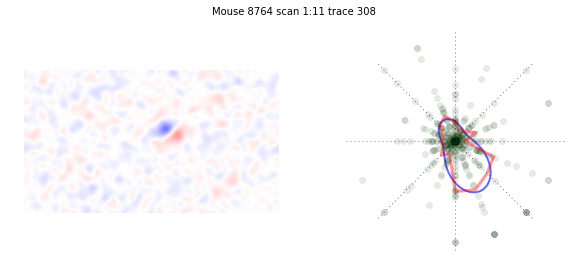

In [62]:
make_it_happen(dict(
    animal_id=8764, 
    session=1, 
    scan_idx=11, 
    extract_method=2, 
    spike_method=2, 
    trace_id=308))

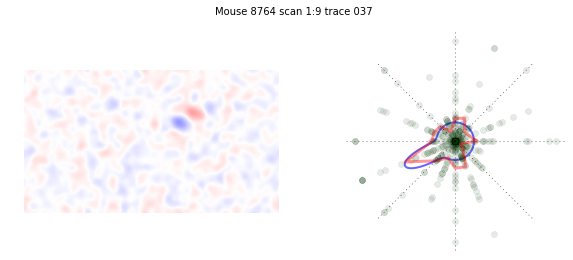

In [63]:
make_it_happen(dict(
    animal_id=8764, 
    session=1, 
    scan_idx=9, 
    extract_method=2, 
    spike_method=2, 
    trace_id=37))

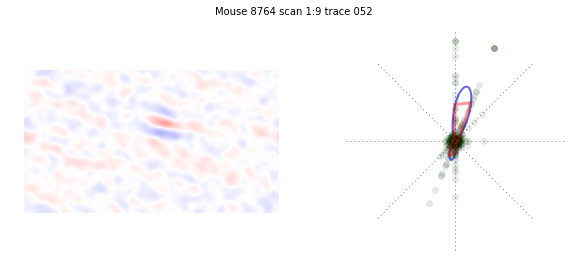

In [64]:
make_it_happen(dict(
    animal_id=8764, 
    session=1, 
    scan_idx=9, 
    extract_method=2, 
    spike_method=2, 
    trace_id=52))

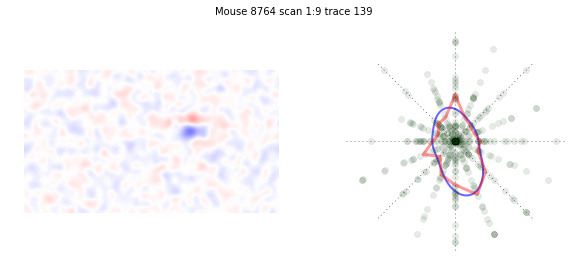

In [65]:
make_it_happen(dict(
    animal_id=8764, 
    session=1, 
    scan_idx=9, 
    extract_method=2, 
    spike_method=2, 
    trace_id=139))

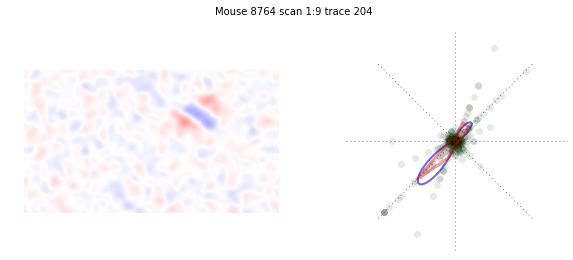

In [66]:
make_it_happen(dict(
    animal_id=8764, 
    session=1, 
    scan_idx=9, 
    extract_method=2, 
    spike_method=2, 
    trace_id=204))

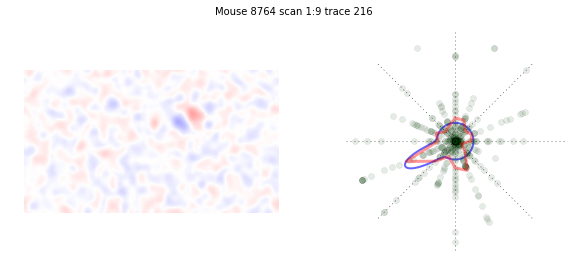

In [67]:
make_it_happen(dict(
    animal_id=8764, 
    session=1, 
    scan_idx=9, 
    extract_method=2, 
    spike_method=2, 
    trace_id=216))

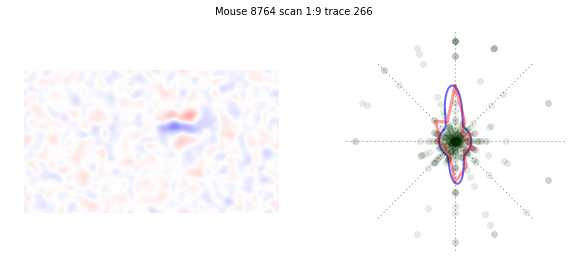

In [68]:
make_it_happen(dict(
    animal_id=8764, 
    session=1, 
    scan_idx=9, 
    extract_method=2, 
    spike_method=2, 
    trace_id=266))

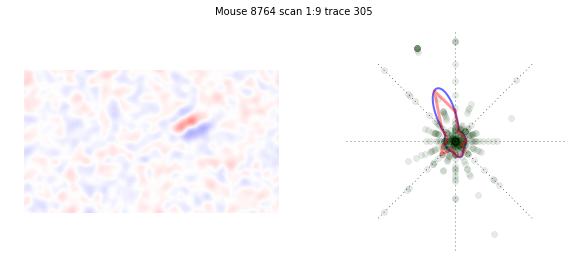

In [69]:
make_it_happen(dict(
    animal_id=8764, 
    session=1, 
    scan_idx=9, 
    extract_method=2, 
    spike_method=2, 
    trace_id=305))

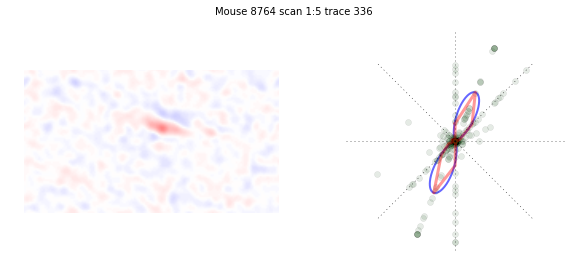

In [70]:
make_it_happen(dict(
    animal_id=8764, 
    session=1, 
    scan_idx=5, 
    extract_method=2, 
    spike_method=5, 
    trace_id=336))

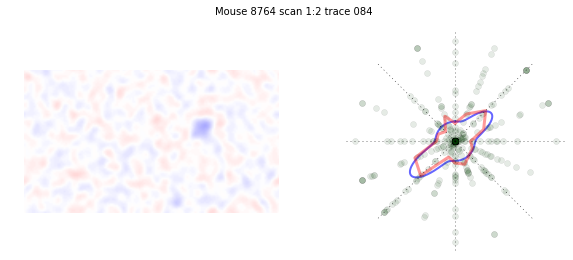

In [71]:
make_it_happen(dict(
    animal_id=8764, 
    session=1, 
    scan_idx=2, 
    extract_method=2, 
    spike_method=5, 
    trace_id=84))

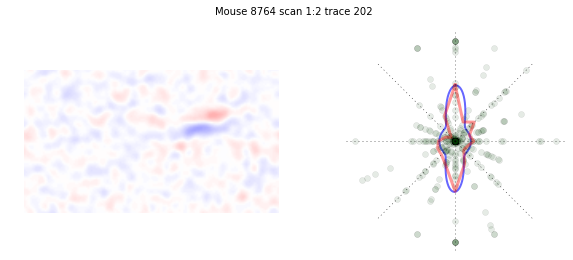

In [72]:
make_it_happen(dict(
    animal_id=8764, 
    session=1, 
    scan_idx=2, 
    extract_method=2, 
    spike_method=5, 
    trace_id=202))

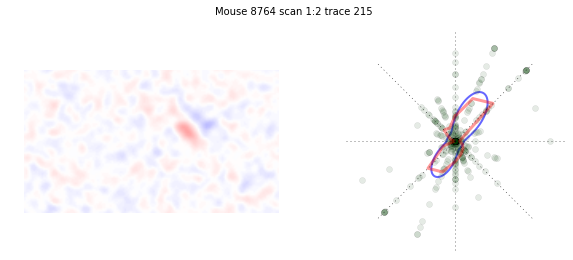

In [73]:
make_it_happen(dict(
    animal_id=8764, 
    session=1, 
    scan_idx=2, 
    extract_method=2, 
    spike_method=5, 
    trace_id=215))

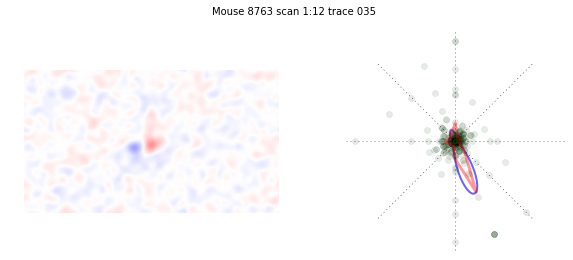

In [74]:
make_it_happen(dict(
    animal_id=8763, 
    session=1, 
    scan_idx=12, 
    extract_method=2, 
    spike_method=5, 
    trace_id=35))

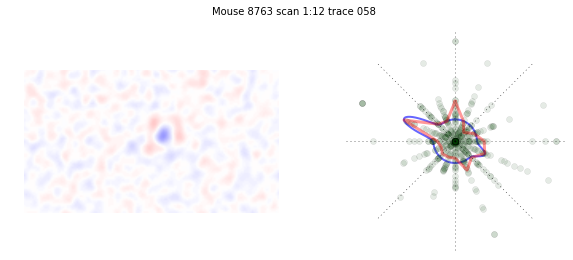

In [75]:
make_it_happen(dict(
    animal_id=8763, 
    session=1, 
    scan_idx=12, 
    extract_method=2, 
    spike_method=5, 
    trace_id=58))

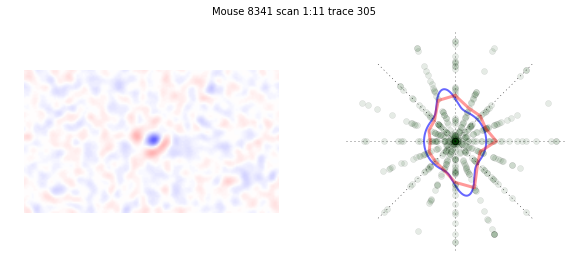

In [76]:
make_it_happen(dict(
    animal_id=8341, 
    session=1, 
    scan_idx=11, 
    extract_method=2, 
    spike_method=2, 
    trace_id=305))

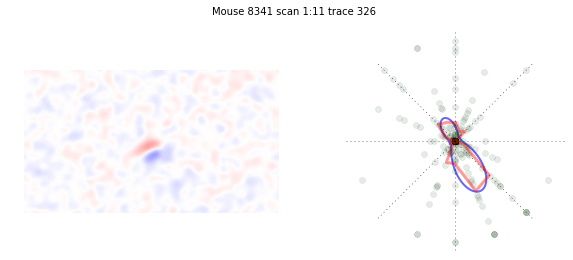

In [77]:
make_it_happen(dict(
    animal_id=8341, 
    session=1, 
    scan_idx=11, 
    extract_method=2, 
    spike_method=5, 
    trace_id=326))

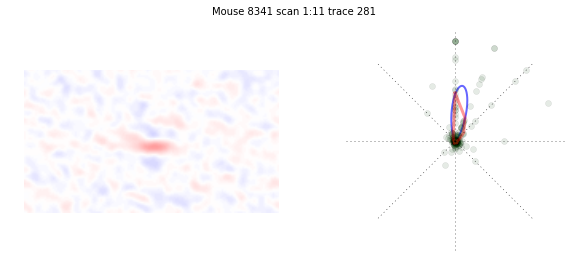

In [78]:
make_it_happen(dict(
    animal_id=8341, 
    session=1, 
    scan_idx=11, 
    extract_method=2, 
    spike_method=5, 
    trace_id=281))

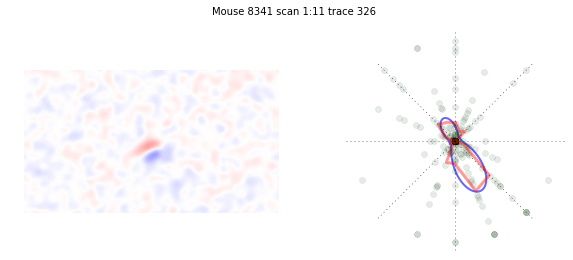

In [79]:
make_it_happen(dict(
    animal_id=8341, 
    session=1, 
    scan_idx=11, 
    extract_method=2, 
    spike_method=5, 
    trace_id=326))

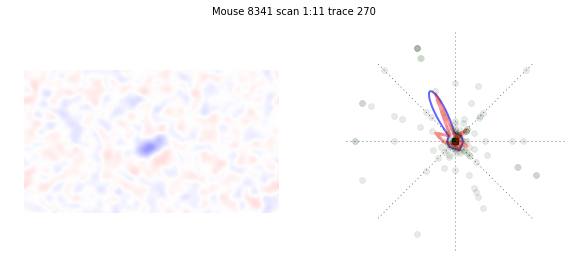

In [80]:
make_it_happen(dict(
    animal_id=8341, 
    session=1, 
    scan_idx=11, 
    extract_method=2, 
    spike_method=5, 
    trace_id=270))

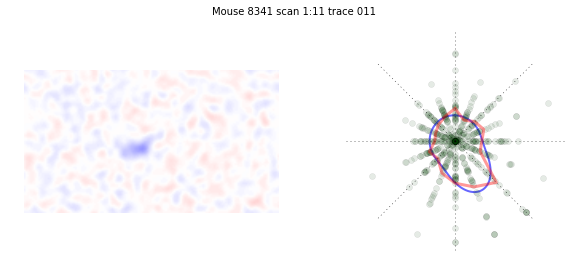

In [81]:
make_it_happen(dict(
    animal_id=8341, 
    session=1, 
    scan_idx=11, 
    extract_method=2, 
    spike_method=2, 
    trace_id=11))